In [352]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error

In [385]:
year = np.arange(1960,2022,1)
year

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [3]:
df1 = pd.read_excel('crude oil price.xlsx')

In [9]:
df1

,Year,Avg Crude Oil Price (USD per barrel)
0,1960,2.51
1,1961,2.24
2,1962,2.24
3,1963,2.51
4,1964,2.78
...,...,...
57,2017,52.51
58,2018,64.94
59,2019,64.37
60,2020,39.19


In [99]:
cop = df1

cop.columns = cop.columns.str.replace(' ', '_').str.lower()

cop

,year,avg_crude_oil_price_(usd_per_barrel)
0,1960,2.51
1,1961,2.24
2,1962,2.24
3,1963,2.51
4,1964,2.78
...,...,...
57,2017,52.51
58,2018,64.94
59,2019,64.37
60,2020,39.19


In [102]:
df2 = pd.read_excel('PUMP PRICE PMS.xlsx', header=None)

In [103]:
df2

,0,1,2,3,4,5,6,7,8,9,...,436,437,438,439,440,441,442,443,444,445
0,Fuel Pump Price Per Litre - Average (PMS) (1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S/No,Descriptor,1985 January,1985 February,1985 March,1985 April,1985 May,1985 June,1985 July,1985 August,...,2021 March,2021 April,2021 May,2021 June,2021 July,2021 August,2021 September,2021 October,2021 November,2021 December
2,1,Price in Naira Per Litre,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,172.68,166.38,168.06,165.61,165.91,164.91,164.85,165.6,167.6,165.77


In [136]:
pms = df2.drop(axis=0, index=0)

 
pms = pms.iloc[:, 1:]

pms = pms.set_index(1)

pms.index = ['date', 'Price in Naira Per Litre']

pms.index = pms.index.str.replace(' ', '_').str.lower()

pms

,2,3,4,5,6,7,8,9,10,11,...,436,437,438,439,440,441,442,443,444,445
date,1985 January,1985 February,1985 March,1985 April,1985 May,1985 June,1985 July,1985 August,1985 September,1985 October,...,2021 March,2021 April,2021 May,2021 June,2021 July,2021 August,2021 September,2021 October,2021 November,2021 December
price_in_naira_per_litre,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,172.68,166.38,168.06,165.61,165.91,164.91,164.85,165.6,167.6,165.77


In [199]:
tms = pms.T

tms = tms.reset_index(drop=True)

tms['date'] = pd.to_datetime(tms['date'])

tms['year'] = tms['date'].dt.year

# 



# tms[tms.price_in_naira_per_litre == '141/97']

tms['price_in_naira_per_litre'].loc[324] = 97

tms['price_in_naira_per_litre'] = pd.to_numeric(tms['price_in_naira_per_litre'])
# pms.loc['date']

C:\Users\Ebenezer\AppData\Local\Temp\ipykernel_13316\3811649901.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tms['price_in_naira_per_litre'].loc[324] = 97


In [218]:
# tms = tms.drop('date', axis=1)
pms_val = tms.groupby('year')['price_in_naira_per_litre'].mean().values

pms_val.shape

(37,)

In [233]:
a = list(np.zeros(25))
b = list(pms_val)

a.extend(b)
pm = np.array(a)

pm.shape
# print(a)

(62,)

In [237]:
pms_col = ['year', 'price_in_naira_per_litre']

pms = pd.DataFrame({'year':year, 'price_in_naira_per_litre':pm}, columns=pms_col)

pms[24:]

,year,price_in_naira_per_litre
24,1984,0.000000
25,1985,0.200000
26,1986,0.400000
27,1987,0.400000
28,1988,0.415000
29,1989,0.600000
30,1990,0.600000
31,1991,0.700000
32,1992,0.700000
33,1993,1.337500


In [10]:
df3 = pd.read_excel('NG CPI.xlsx')

In [84]:
df3.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,Last Updated Date,2023-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.0,2021.0
3,Aruba,ABW,Consumer price index (2010 = 100),FP.CPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,104.970853,102.480876,102.912772,103.401365,102.438495,101.385139,105.061406,109.534355,NaN,NaN
4,Africa Eastern and Southern,AFE,Consumer price index (2010 = 100),FP.CPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
nigeria_wdi = df3[df3['World Development Indicators'] == 'NGA']

nig_val = nigeria_wdi.iloc[:, 4:]
# nigeria_wdi
# nigeria_wdi.iloc[:, 3:]

nig_val

,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
177,0.065887,0.070025,0.073712,0.071726,0.07234,0.075309,0.082606,0.079528,0.079149,0.087188,...,124.38222,134.924642,145.802923,158.938872,183.853082,214.232119,240.142919,267.511515,302.946153,354.304147


In [50]:
nigeria_wdi

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
177,Nigeria,NGA,Consumer price index (2010 = 100),FP.CPI.TOTL,0.065887,0.070025,0.073712,0.071726,0.07234,0.075309,...,124.38222,134.924642,145.802923,158.938872,183.853082,214.232119,240.142919,267.511515,302.946153,354.304147


In [80]:
wdi_val = nig_val.to_numpy()[0]

In [81]:
wdi_val

array([6.58874341e-02, 7.00246031e-02, 7.37118413e-02, 7.17255612e-02,
       7.23401009e-02, 7.53085471e-02, 8.26062059e-02, 7.95280205e-02,
       7.91494202e-02, 8.71878188e-02, 9.91823167e-02, 1.15050609e-01,
       1.19028657e-01, 1.25459376e-01, 1.41360590e-01, 1.89372567e-01,
       2.35390101e-01, 2.70905369e-01, 3.29716881e-01, 3.68325839e-01,
       4.05056257e-01, 4.89359899e-01, 5.27029587e-01, 6.49365442e-01,
       7.65085827e-01, 8.21972596e-01, 8.68966014e-01, 9.67075080e-01,
       1.49423955e+00, 2.24833277e+00, 2.41390899e+00, 2.72788548e+00,
       3.94421805e+00, 6.19894027e+00, 9.73430184e+00, 1.68243295e+01,
       2.17485235e+01, 2.36036452e+01, 2.59631548e+01, 2.76814933e+01,
       2.96007321e+01, 3.51874696e+01, 3.97184120e+01, 4.52916136e+01,
       5.20844651e+01, 6.13885701e+01, 6.64379160e+01, 7.00175962e+01,
       7.81263867e+01, 8.79351236e+01, 1.00000000e+02, 1.10840028e+02,
       1.24382220e+02, 1.34924642e+02, 1.45802923e+02, 1.58938872e+02,
      

In [253]:
columns = ['year', 'Consumer Price Index']
# dat = np.array([year, wdi_val])
# dat
cpi = pd.DataFrame({'year':year, 'Consumer Price Index':wdi_val}, columns=columns)

In [255]:
cpi.columns = cpi.columns.str.replace(' ', '_').str.lower()

cpi

,year,consumer_price_index
0,1960,0.065887
1,1961,0.070025
2,1962,0.073712
3,1963,0.071726
4,1964,0.072340
...,...,...
57,2017,214.232119
58,2018,240.142919
59,2019,267.511515
60,2020,302.946153


Text(0, 0.5, 'World Development Indicators')

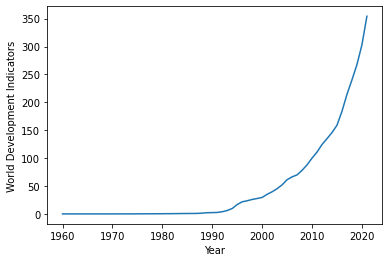

In [85]:
plt.plot(year, wdi_val)

plt.xlabel('Year')
plt.ylabel('Consumer Price Index')

In [239]:
df5 = pd.read_excel('NG_GDP_GROWTH.xlsx')

In [240]:
df5

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,Last Updated Date,2023-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.000000,1962.000000,1963.000000,1964.000000,1965.000000,...,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2021.000000
3,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.035375,6.429817,-0.020479,3.543630,2.116716,5.482371,5.257856,0.635029,-18.589100,17.172509
4,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.237304,7.984460,5.163873,4.583677,5.328044,...,0.770097,4.229408,4.039082,2.895728,2.485952,2.639537,2.610797,2.038299,-3.042653,4.402447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Kosovo,XKX,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,1.712195,5.340908,3.348804,5.916270,5.571757,4.825690,3.406631,4.756831,-5.340275,10.745612
265,"Yemen, Rep.",YEM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.392990,4.823519,-0.188690,-27.994546,-9.375124,-5.071796,0.752448,NaN,NaN,NaN
266,South Africa,ZAF,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,3.844734,6.177931,7.373709,7.939609,6.122798,...,2.396232,2.485468,1.413826,1.321862,0.664552,1.157947,1.522329,0.303453,-6.342471,4.913097
267,Zambia,ZMB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.361382,-2.490839,3.272393,12.214048,16.647456,...,7.597593,5.057232,4.697992,2.920375,3.776679,3.504336,4.034494,1.441306,-2.785055,4.598734


In [251]:
nigeria_gdp = df5[df5['World Development Indicators'] == 'NGA']
# nigeria_gdp
gdp_val = nigeria_gdp.iloc[:, 4:]
# gdp_val
gdp = gdp_val.fillna(0)
gdp

,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
177,0.0,0.191795,4.102993,8.578619,4.950489,4.884977,-4.250514,-15.743628,-1.24836,24.197384,...,4.230061,6.671335,6.309719,2.652693,-1.616869,0.805887,1.922757,2.208429,-1.794253,3.647187


In [252]:
gdp_value = gdp.to_numpy()[0]

gdp_value

array([  0.        ,   0.19179549,   4.10299259,   8.57861892,
         4.95048867,   4.88497683,  -4.25051418, -15.74362821,
        -1.24836025,  24.19738395,  25.00724193,  14.23753156,
         3.36426204,   5.39276048,  11.16067455,  -5.22774756,
         9.04235173,   6.02411785,  -5.76415839,   6.75943094,
         4.20483104, -13.12788049,  -6.80338882, -10.92408503,
        -1.11562322,   5.91302746,   0.06094527,   3.20012547,
         7.33402549,   1.9193813 ,  11.77688593,   0.3583526 ,
         4.63119295,  -2.03511878,  -1.81492448,  -0.07266477,
         4.19592405,   2.93709942,   2.5812541 ,   0.58412689,
         5.01593476,   5.91768465,  15.32915574,   7.34719497,
         9.25055823,   6.43851653,   6.05942803,   6.59113036,
         6.76447278,   8.0369251 ,   8.00565592,   5.3079242 ,
         4.23006118,   6.67133539,   6.30971866,   2.6526933 ,
        -1.61686895,   0.80588662,   1.92275734,   2.20842928,
        -1.79425308,   3.64718654])

In [256]:
gdp_col = ['year', 'GDP growth rate']
# dat = np.array([year, wdi_val])
# dat
gdp = pd.DataFrame({'year':year, 'GDP growth rate':gdp_value}, columns=gdp_col)

In [257]:
gdp

,year,GDP growth rate
0,1960,0.000000
1,1961,0.191795
2,1962,4.102993
3,1963,8.578619
4,1964,4.950489
...,...,...
57,2017,0.805887
58,2018,1.922757
59,2019,2.208429
60,2020,-1.794253


In [258]:
gdp.columns = gdp.columns.str.replace(' ', '_').str.lower()

gdp

,year,gdp_growth_rate
0,1960,0.000000
1,1961,0.191795
2,1962,4.102993
3,1963,8.578619
4,1964,4.950489
...,...,...
57,2017,0.805887
58,2018,1.922757
59,2019,2.208429
60,2020,-1.794253


In [371]:
df = pd.merge(cpi, pms, on= 'year').merge(cop, on ='year').merge(gdp, on ='year')

df.head()

,year,consumer_price_index,price_in_naira_per_litre,avg_crude_oil_price_(usd_per_barrel),gdp_growth_rate
0,1960,0.065887,0.0,2.51,0.000000
1,1961,0.070025,0.0,2.24,0.191795
2,1962,0.073712,0.0,2.24,4.102993
3,1963,0.071726,0.0,2.51,8.578619
4,1964,0.072340,0.0,2.78,4.950489


In [372]:
df = df.set_index('year')

In [373]:
df_train, df_test = train_test_split(df, test_size=0.2, shuffle=False)

In [374]:
df_train.head()

,consumer_price_index,price_in_naira_per_litre,avg_crude_oil_price_(usd_per_barrel),gdp_growth_rate
year,,,,
1960,0.065887,0.0,2.51,0.000000
1961,0.070025,0.0,2.24,0.191795
1962,0.073712,0.0,2.24,4.102993
1963,0.071726,0.0,2.51,8.578619
1964,0.072340,0.0,2.78,4.950489


In [355]:
df_test.head()

In [375]:
y_train = df_train.gdp_growth_rate.values
y_test = df_test.gdp_growth_rate.values

del df_train['gdp_growth_rate']
del df_test['gdp_growth_rate']

In [376]:
df_train.head()

,consumer_price_index,price_in_naira_per_litre,avg_crude_oil_price_(usd_per_barrel)
year,,,
1960,0.065887,0.0,2.51
1961,0.070025,0.0,2.24
1962,0.073712,0.0,2.24
1963,0.071726,0.0,2.51
1964,0.072340,0.0,2.78


In [377]:
mms = MinMaxScaler()

In [378]:
X_train = mms.fit_transform(df_train)
X_test = mms.transform(df_test)

In [369]:
np.round(X_train, 3)

array([[0.   , 0.386, 0.003],
       [0.   , 0.391, 0.   ],
       [0.   , 0.487, 0.   ],
       [0.   , 0.597, 0.003],
       [0.   , 0.508, 0.006],
       [0.   , 0.506, 0.008],
       [0.   , 0.282, 0.008],
       [0.   , 0.   , 0.01 ],
       [0.   , 0.356, 0.01 ],
       [0.   , 0.98 , 0.011],
       [0.   , 1.   , 0.012],
       [0.001, 0.736, 0.014],
       [0.001, 0.469, 0.014],
       [0.001, 0.519, 0.022],
       [0.001, 0.66 , 0.098],
       [0.002, 0.258, 0.108],
       [0.002, 0.608, 0.122],
       [0.003, 0.534, 0.128],
       [0.003, 0.245, 0.134],
       [0.004, 0.552, 0.281],
       [0.004, 0.49 , 0.37 ],
       [0.005, 0.064, 0.353],
       [0.006, 0.219, 0.311],
       [0.007, 0.118, 0.282],
       [0.009, 0.359, 0.279],
       [0.01 , 0.531, 0.266],
       [0.01 , 0.388, 0.127],
       [0.012, 0.465, 0.183],
       [0.018, 0.566, 0.144],
       [0.028, 0.433, 0.17 ],
       [0.03 , 0.675, 0.226],
       [0.034, 0.395, 0.196],
       [0.05 , 0.5  , 0.186],
       [0.

In [289]:
dv = DictVectorizer(sparse=False)

In [290]:
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [299]:
test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

In [379]:
rf = RandomForestRegressor()


In [380]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [344]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [381]:
y_pred = rf.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)


4.415216338301604

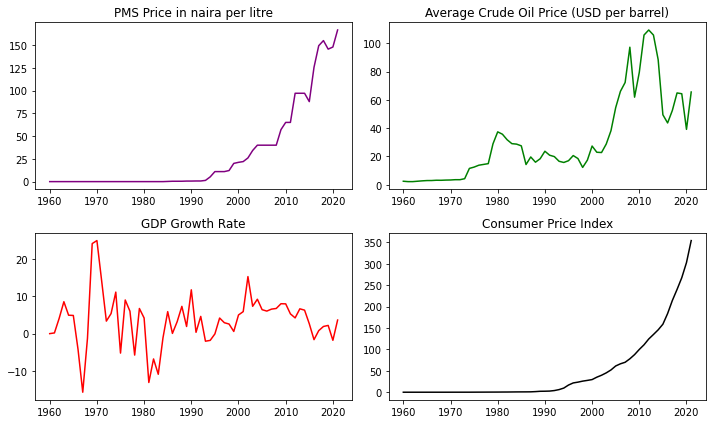

In [387]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,6))

axes[0, 0].plot(year, pms.price_in_naira_per_litre.values, color='purple')
axes[0, 0].set_title('PMS Price in naira per litre')

axes[0, 1].plot(year, cop['avg_crude_oil_price_(usd_per_barrel)'].values, color='green')
axes[0, 1].set_title('Average Crude Oil Price (USD per barrel)')

axes[1, 0].plot(year, gdp.gdp_growth_rate.values, color='red')
axes[1, 0].set_title('GDP Growth Rate')

axes[1, 1].plot(year, cpi.consumer_price_index.values, color='black')
axes[1, 1].set_title('Consumer Price Index')

fig.tight_layout()